In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re, string, unicodedata
import nltk
import inflect
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import re

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [2]:
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|DrProf|Capt|Cpt|Lt|Mt)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|me|edu)"


In [3]:
filename='Output_trim_text.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

In [4]:
def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    if "..." in text: text = text.replace("...","<prd><prd><prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    text = text.replace("ReviewsSalariesInterviewsSalary"," ")
    text = text.replace("Glassdoor"," ")
    text = text.replace("JobsCompany"," ")
    text = text.replace("CalculatorAccount"," ")
    text = text.replace("SettingsAccount"," ")
    text = text.replace("SettingsSign"," ")
    text = text.replace(" InNotificationsAccount"," ")
    text = text.replace("Settingsempty"," ")
    text = text.replace("EmployersUnlock"," ")
    text = text.replace("JobsJobsCompaniesSalariesInterviewsSearch"," ")
    text = text.replace("NowSavemoreJobCompanyRatingSalaryReviewsWhy"," ")
    text = text.replace("applysavemorejobcompanyratingsalarywhy"," ")
    text = text.replace("applysavemorejobcompanyratingsalaryreviewswhy"," ")
    text = text.replace("applysavemore.*"," ")
    
    #text = re.sub(r'.*nowsavemorejobcompanyratingsalaryreviewswhy.*\n?','',text, flags=re.MULTILINE)
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [16]:
sentences = split_into_sentences(text)

In [17]:
text2 = ' '.join(sentences)
words = re.split(r'\W+', text2)
print("original length",len(words))  

original length 841216


In [20]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words



def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words


def remove_digits(words):
    """Remove digits from list of tokenized words"""
    new_words = []
    for word in words:
        word = word.translate(str.maketrans('','','1234567890'))
        word = word.translate(str.maketrans('','',string.punctuation))
        if not word.isdigit():
            new_words.append(word)
    return(new_words)

def to_removelong_words(words):
    new_words = []
    for word in words:
        if not re.match("applysave.*", word):
            if not re.match("nowsave.*.*", word):
                new_words.append(word)
    return new_words

In [21]:
 
words = to_lowercase(words)
print("length after to lower case",len(words))

words = remove_non_ascii(words)   
print("length after to remove_non_ascii",len(words))

words = remove_punctuation(words)
print("length after remove_punctuation",len(words))

#words = replace_numbers(words) 
#print("length after replace_numbers",len(words))  

words = remove_digits(words)
print("length after digits",len(words))



words =to_removelong_words(words)

print("length after remove long words",len(words))

words = remove_stopwords(words)
print("length after remove_stopwords",len(words))  

length after to lower case 841216
length after to remove_non_ascii 841216
length after remove_punctuation 841215
length after digits 841215
length after remove long words 840616
length after remove_stopwords 572540


In [22]:
words = [x for x in words if x]
print("length after remove_empty strings",len(words))  

long_words = [x for x in words if len(x)>16]


length after remove_empty strings 563743


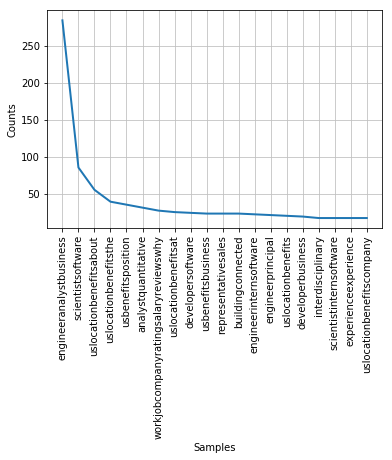

In [23]:
long_words_freq = nltk.FreqDist(long_words)
long_words_freq.plot(20)

In [24]:
print(long_words[:30])


['memberresponsibilities', 'environmentdevelop', 'engineeringevaluate', 'engineersqualifications', 'instinctsexcellent', 'collaboratorsexperience', 'mentoringproficient', 'scriptingexperience', 'scientistsoftware', 'scientistanalytics', 'memberresponsibilities', 'environmentdevelop', 'engineeringevaluate', 'engineersqualifications', 'instinctsexcellent', 'collaboratorsexperience', 'mentoringproficient', 'scriptingexperience', 'scientistsoftware', 'scientistanalytics', 'engineeranalystquantitative', 'engineeranalystquantitative', 'searchesstatistical', 'geneticistresearch', 'geneticistresearch', 'associatesoftware', 'scientistcomputer', 'searchesstatistical', 'geneticistresearch', 'geneticistresearch']


In [25]:
int_words = [x for x in words if len(x)<16 ]
final_words = [x for x in int_words if len(x)>2 ]
print("final word length",len(final_words))  

final word length 542021


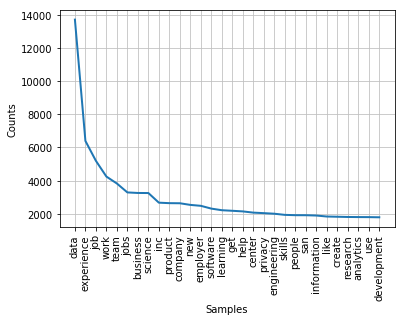

In [26]:
freq = nltk.FreqDist(final_words)
freq.plot(30)

In [27]:
hard_skills = ['Statistics','Mining','Machine','Techniques','SQL','Frameworks',
               'R','Engineering','Programming','Algorithms',
               'Product','Development','Operations','Business','Intelligence','Visualization',
               'JAVA','Scala','Unstructured',
               'BSC','Tableau','Hadoop','Analytical','Mind','Acumen','Computer','Python',
               'Products','Query','Recommendation','Fraud','Detection','Classifiers',
               'Ad-Hoc','Collection','Anomaly','WEKA','Numpy','Matlab',
               'D3.Js','HIVE','Ensemble','Nosql','Databases','Mongodb','Hbase','Currently','Scripting',
               'Programming', 'Languages',
               'Primary','Focus','Insights','Interpreting','phd']
hard_skills = to_lowercase(hard_skills)
hard_res = dict((k, freq[k]) for k in hard_skills if k in freq) 
wc = WordCloud(background_color="black",width=1000,height=500, 
               max_words=200,relative_scaling=0.5,
               normalize_plurals=False).generate_from_frequencies(hard_res)



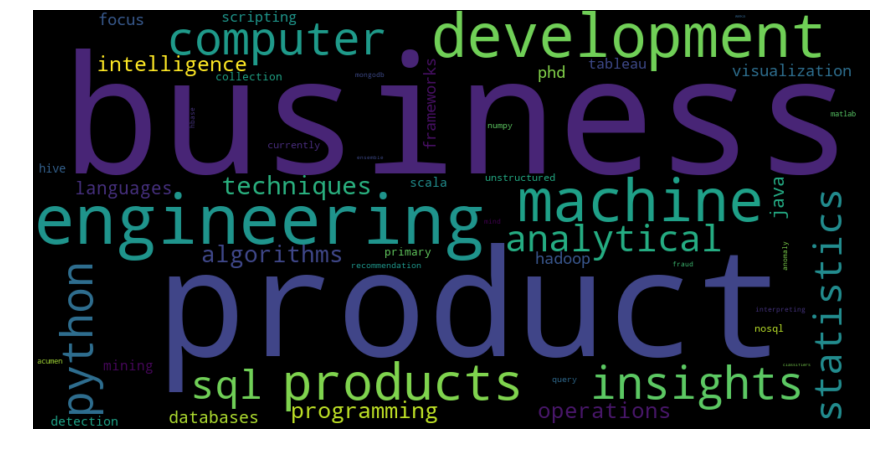

In [28]:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("hard_skils_WordCloud"+".png", bbox_inches='tight')
plt.show()
plt.close()





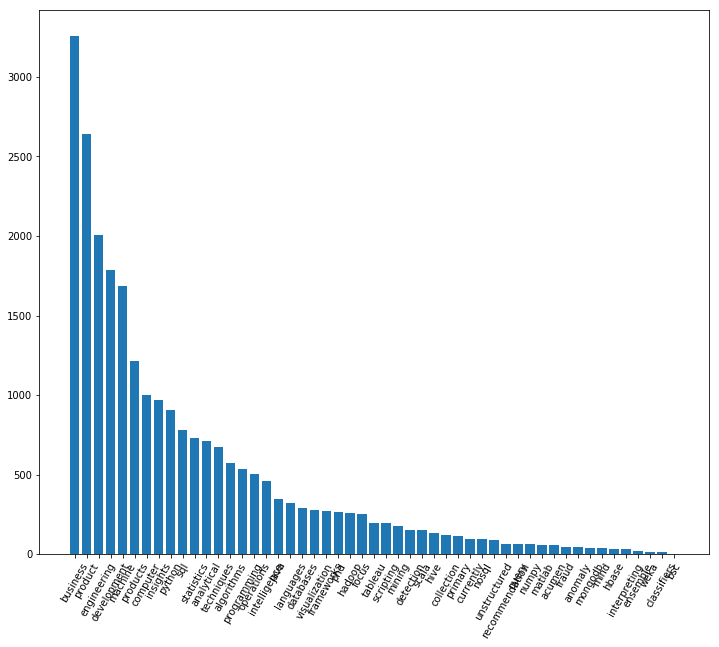

In [29]:
lists = sorted(hard_res.items(), key=lambda x:x[1],reverse = True) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,10))
plt.bar(x, y)
plt.xticks(rotation=60)
plt.savefig("hard_skils_barplot"+".png", bbox_inches='tight')
plt.show()

In [30]:
soft_skills = ['Communication','Problem', 'Solving','Research', 'Quality','Integrity',
               'Organization','Critical','Thinking',
               'Passion','Collaborate','Presentation']
soft_skills = to_lowercase(soft_skills)

soft_res = dict((k, freq[k]) for k in soft_skills if k in freq)

wc = WordCloud(background_color="black",width=1000,height=500, 
               max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(soft_res)

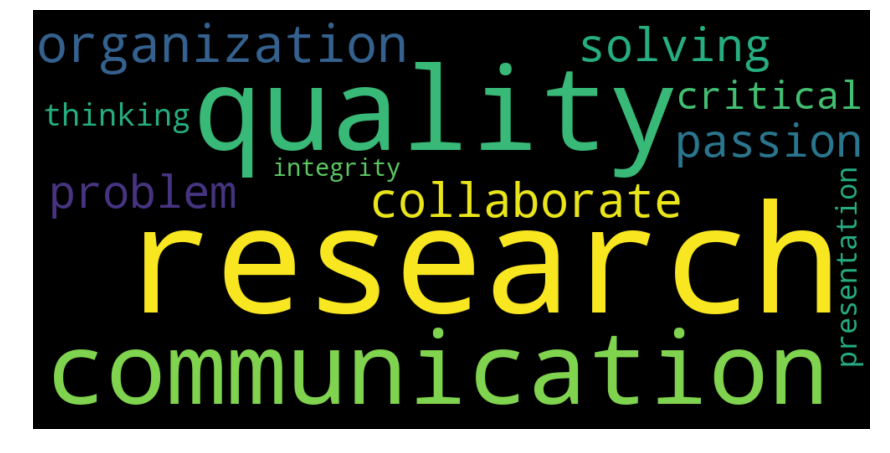

In [31]:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("soft_skils_WordCloud"+".png", bbox_inches='tight')
plt.show()
plt.close()



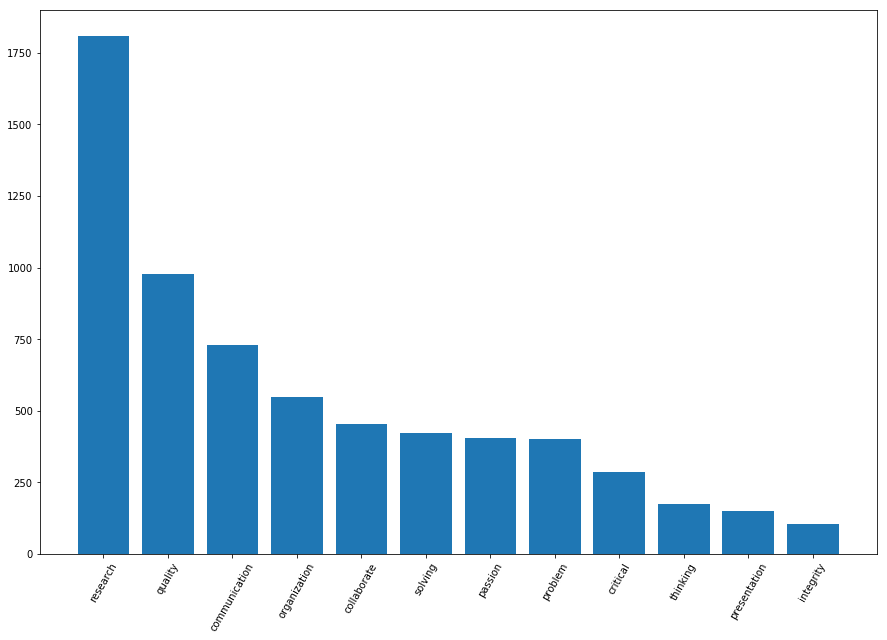

In [32]:
lists = sorted(soft_res.items(), key=lambda x:x[1],reverse = True) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(15,10))
plt.bar(x, y)
plt.xticks(rotation=60)
plt.savefig("soft_skils_barplot"+".png", bbox_inches='tight')
plt.show()